In [1]:
import pandas as pd
import numpy as np

In [2]:
a = np.poly1d([1, 1])
b = np.poly1d([1, -1])

In [3]:
a * b

poly1d([ 1,  0, -1])

In [4]:
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2 # np.poly1d([기울기, 상수항])

poly1d([ 38, -94,  62])

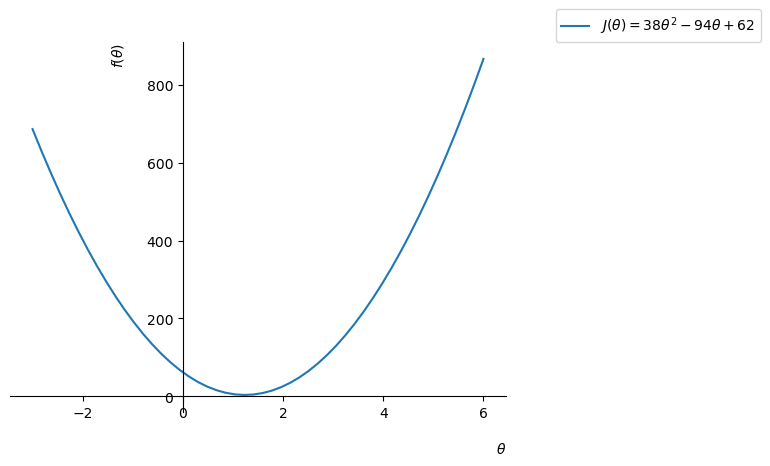

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

theta = np.linspace(-3, 6)
j = 38 * (theta **2) - 94 * theta + 62

plt.plot(theta, j, label='$J(\\theta) = 38\\theta^2 - 94\\theta + 62$')
plt.gca().spines['left'].set_position('zero')  # y축을 x=0 위치로 이동
plt.gca().spines['bottom'].set_position('zero')  # x축을 y=0 위치로 이동
plt.gca().spines['right'].set_color('none')  # 오른쪽 스파인 제거
plt.gca().spines['top'].set_color('none')  # 상단 스파인 제거
plt.gca().yaxis.tick_left()  # y축 눈금을 왼쪽으로 설정
plt.xlabel('$\\theta$', labelpad=15, ha='right', position=(1,0)) # xlabel 위치를 축 끝으로
plt.ylabel('$f(\\theta)$', labelpad=15, ha='right', position=(0,1)) # ylabel 위치를 축 끝으로
plt.legend(loc=(1.1, 1))
plt.show()

In [6]:
import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94 * theta + 62, theta)
diff_th

76*theta - 94

## 보스턴 집값 예측

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>

In [20]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.DataFrame(data, columns=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

In [21]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [25]:
import plotly.express as px

fig = px.histogram(boston, x='MEDV')
fig.show()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston.corr().round(1)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


<Axes: >

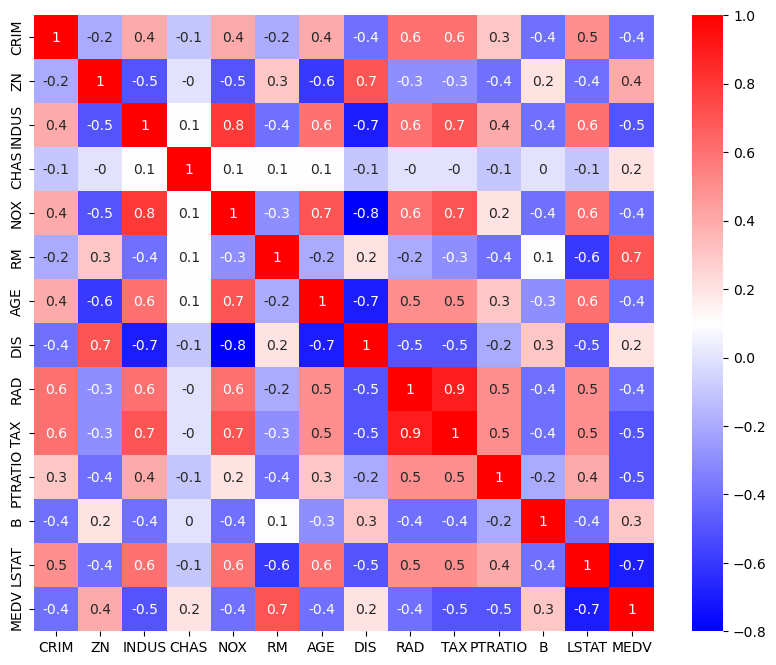

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='bwr')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

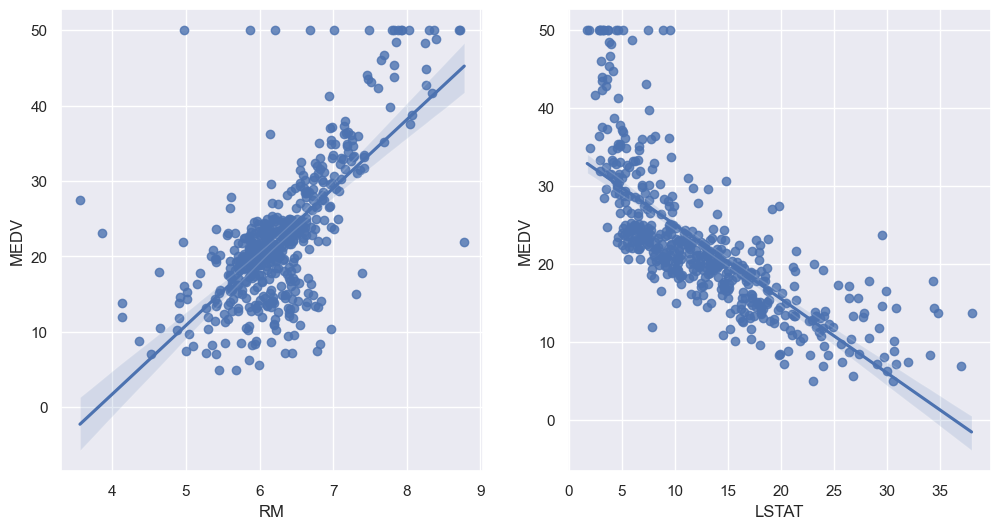

In [33]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='MEDV', data=boston, ax=ax[0])
sns.regplot(x='LSTAT', y='MEDV', data=boston, ax=ax[1])

- 저소득층 비율인 LSTAT과 집값 MEDV 사이에 음의 상관관계가 존재함
- 저소득층이 모여살기 때문에 해당 지역의 집값이 낮은 것인지, 저소득층의 비율과 집값이 인과관계를 갖는지 판단이 어려움
- LSTAT이 집값을 예측하기 위한 적절한 변수인지 생각해 볼 수 있음

In [34]:
from sklearn.model_selection import train_test_split

X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [35]:
from sklearn.linear_model import LinearRegression # OLS

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.642806069019824
RMSE of Test Data :  4.931352584146716


In [42]:
# 결정계수
print(reg.score(X=X_train, y=y_train))
print(reg.score(X=X_test, y=y_test))

0.738661521750315
0.7317666881184411


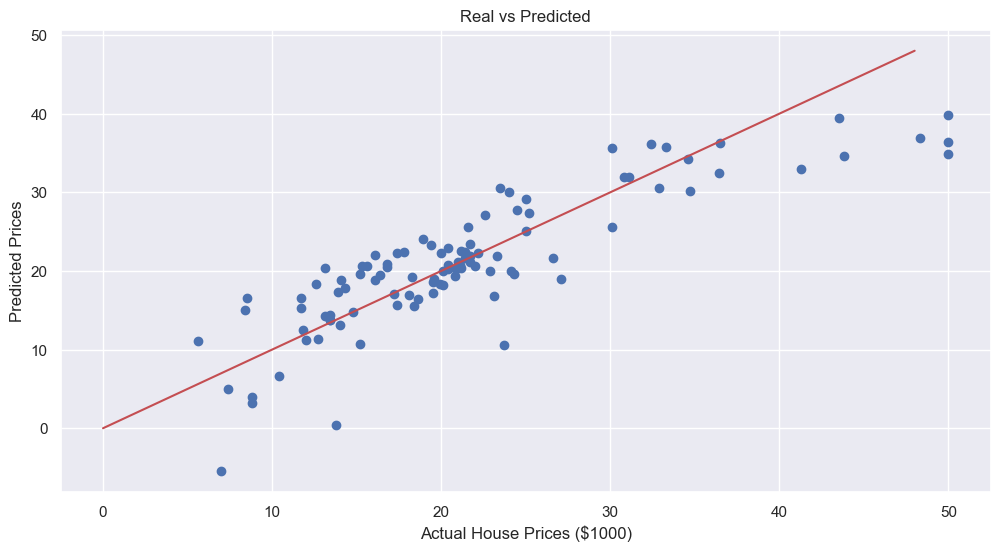

In [43]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0, 48], [0, 48], 'r')
plt.show()

- LSTAT을 제외한다면,,, 

In [44]:
X = boston.drop(['MEDV', 'LSTAT'], axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  5.165137874244864
RMSE of Test Data :  5.2955950325971655


- LSTAT 제외시 모델의 예측 성능은 하락. 그러나 변수를 모델에 포함시키는 것이 맞는지, 아닌지는 분석가의 판단

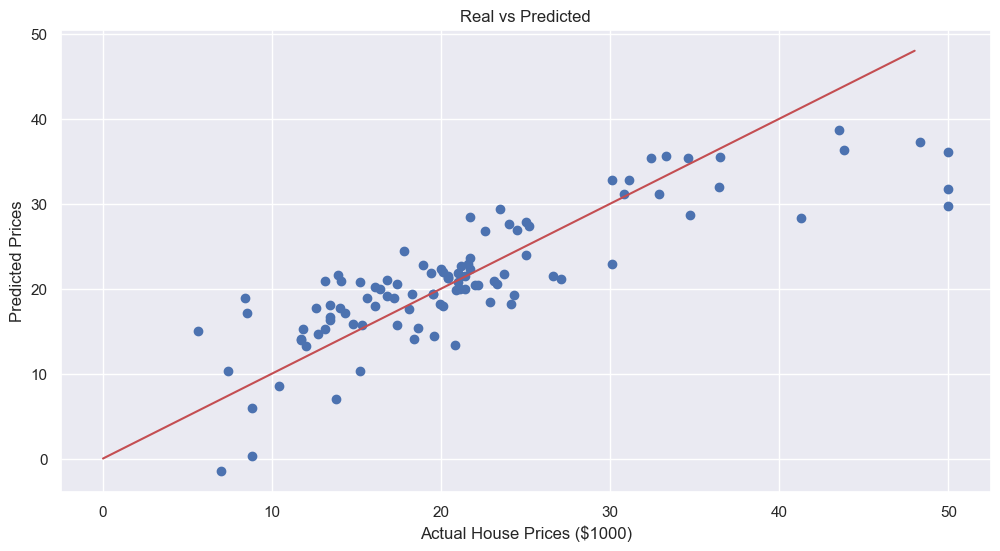

In [45]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0, 48], [0, 48], 'r')
plt.show()